In [1]:
!pip install matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable


In [2]:
pip install --upgrade matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib
print(matplotlib.__version__)


3.9.2


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Load the dataset
data = pd.read_csv('DataSet.csv')

In [6]:

# Data exploration (displaying basic info)
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15079 entries, 0 to 15078
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer ID     15079 non-null  object
 1   Age             15079 non-null  int64 
 2   Gender          15079 non-null  int64 
 3   Annual Income   15079 non-null  int64 
 4   Spending Score  15079 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 589.1+ KB
None
                Age        Gender  Annual Income  Spending Score
count  15079.000000  15079.000000   15079.000000    15079.000000
mean      54.191591      0.496319  109742.880562       50.591617
std       21.119207      0.500003   52249.425866       28.726977
min       18.000000      0.000000   20022.000000        1.000000
25%       36.000000      0.000000   64141.000000       26.000000
50%       54.000000      0.000000  109190.000000       51.000000
75%       72.000000      1.000000  155008.000000       75.000000
max    

In [7]:
# Data exploration - distribution plots for Age, Annual Income, and Spending Score
def plot_distribution(data, cols):
    plt.figure(figsize=(12, 6))
    for i, col in enumerate(cols):
        plt.subplot(1, len(cols), i + 1)
        sns.histplot(data[col], bins=30, kde=True)
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

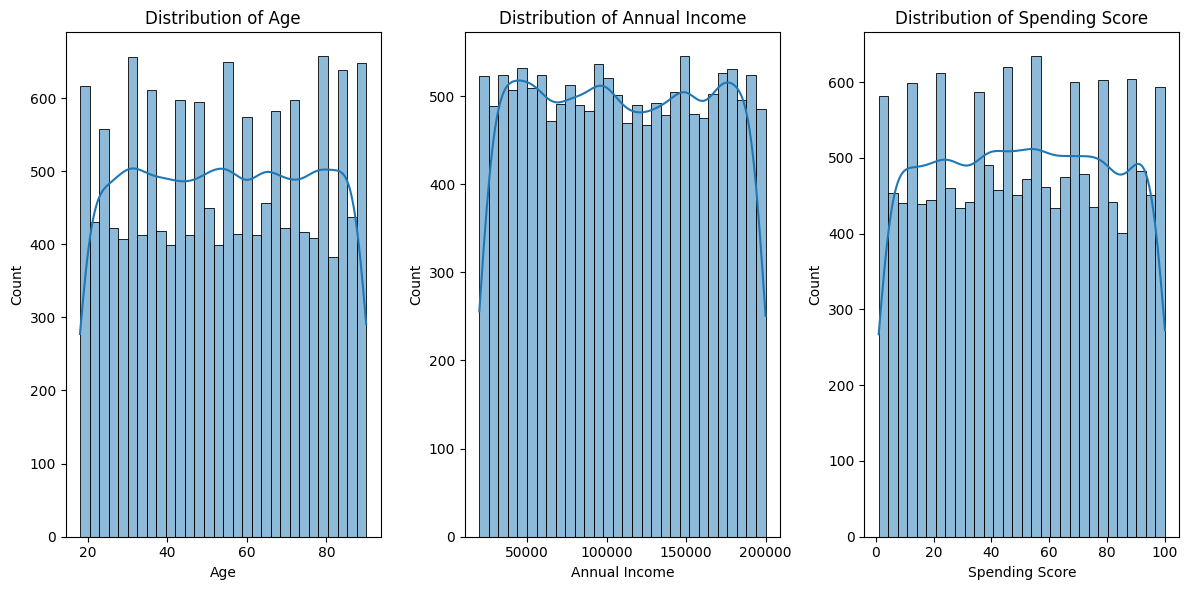

In [8]:
# Columns to plot
columns_to_plot = ['Age', 'Annual Income', 'Spending Score']
plot_distribution(data, columns_to_plot)


In [9]:
# Drop irrelevant columns (Customer ID)
data.drop('Customer ID', axis=1, inplace=True)

In [10]:
# Checking for missing values
print("Missing values per column:\n", data.isnull().sum())


Missing values per column:
 Age               0
Gender            0
Annual Income     0
Spending Score    0
dtype: int64


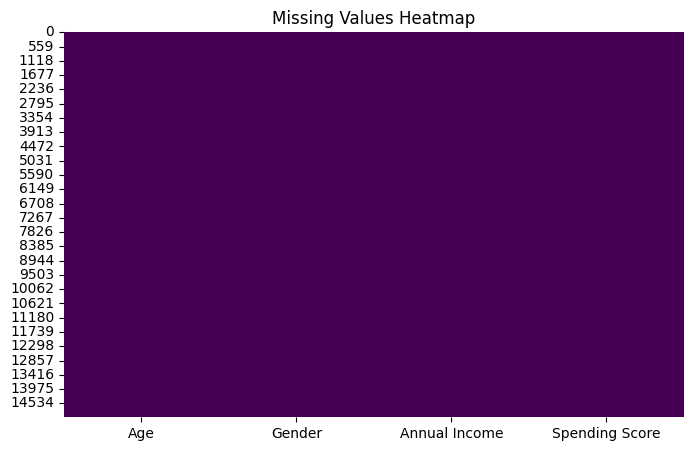

In [11]:
# Missing values heatmap
def plot_missing_values(data):
    plt.figure(figsize=(8, 5))
    sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Values Heatmap')
    plt.show()

plot_missing_values(data)

In [12]:
# Checking for outliers in Annual Income (boxplot or any criteria-based removal)
data = data[(data['Annual Income'] >= 30000) & (data['Annual Income'] <= 200000)]  # Example range



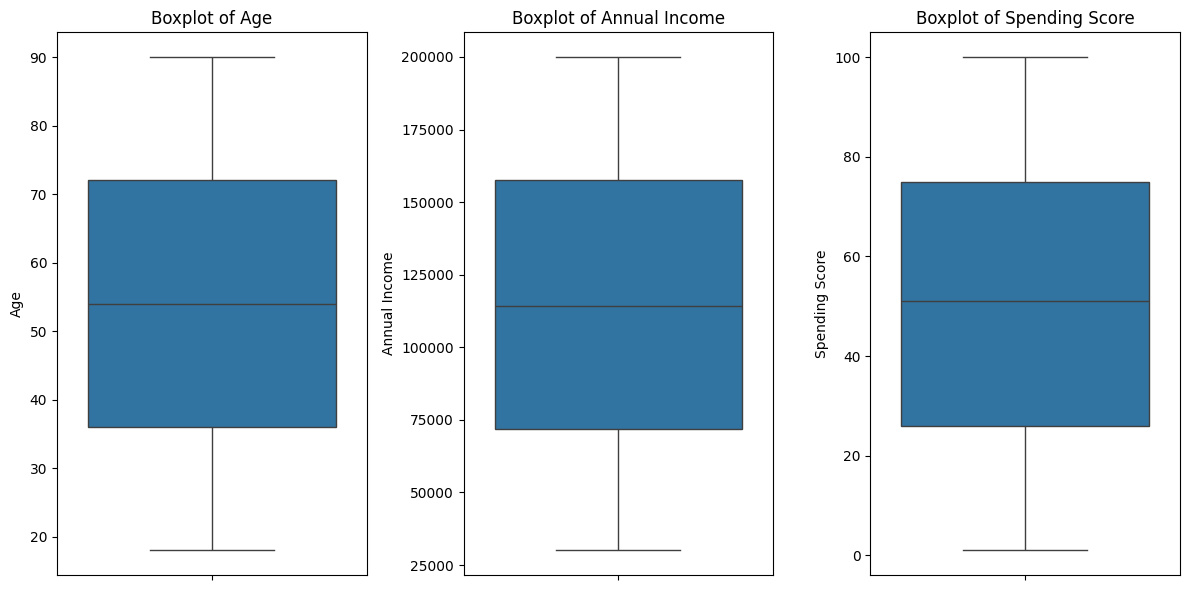

In [13]:
# Outlier detection using boxplots
def plot_boxplot(data, cols):
    plt.figure(figsize=(12, 6))
    for i, col in enumerate(cols):
        plt.subplot(1, len(cols), i + 1)
        sns.boxplot(data[col])
        plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    # plt.show()  # Commented out here

# Columns to check for outliers
columns_for_boxplot = ['Age', 'Annual Income', 'Spending Score']
plot_boxplot(data, columns_for_boxplot)

plt.show()  # Explicitly call plt.show() after function call


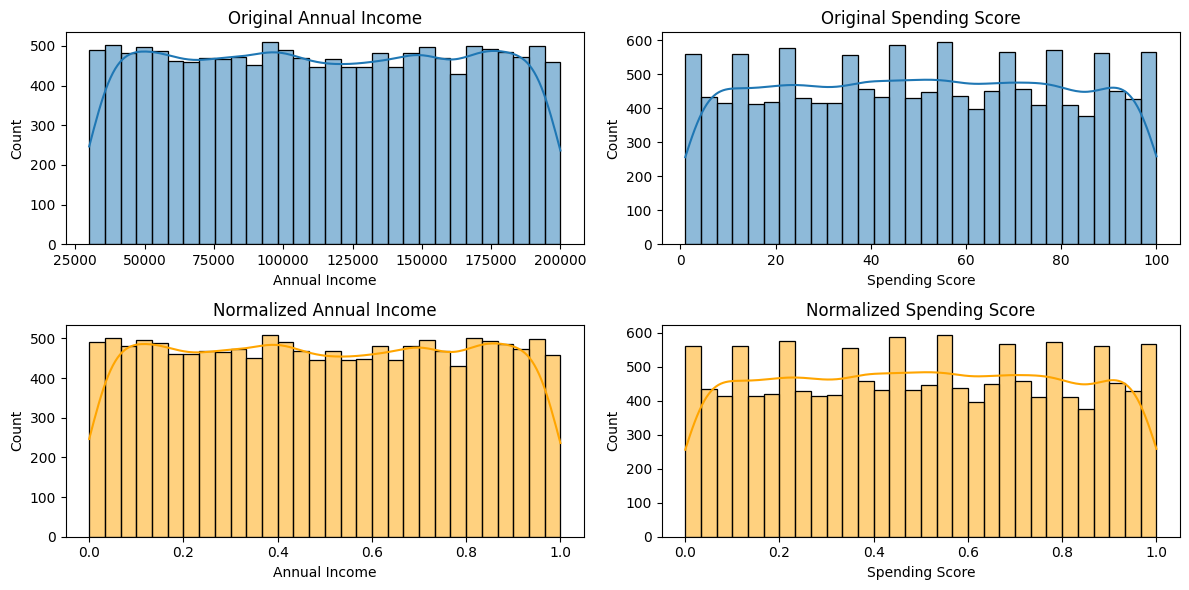

In [14]:
# Data normalization: Before and after normalization comparison (for Annual Income)
from sklearn.preprocessing import MinMaxScaler

def plot_before_after_scaling(data, columns):
    scaler = MinMaxScaler()
    normalized_data = data.copy()
    normalized_data[columns] = scaler.fit_transform(data[columns])
    
    plt.figure(figsize=(12, 6))
    
    for i, col in enumerate(columns):
        plt.subplot(2, len(columns), i + 1)
        sns.histplot(data[col], bins=30, kde=True)
        plt.title(f'Original {col}')
        
        plt.subplot(2, len(columns), i + 1 + len(columns))
        sns.histplot(normalized_data[col], bins=30, kde=True, color='orange')
        plt.title(f'Normalized {col}')
    
    plt.tight_layout()
    plt.show()

plot_before_after_scaling(data, ['Annual Income', 'Spending Score'])




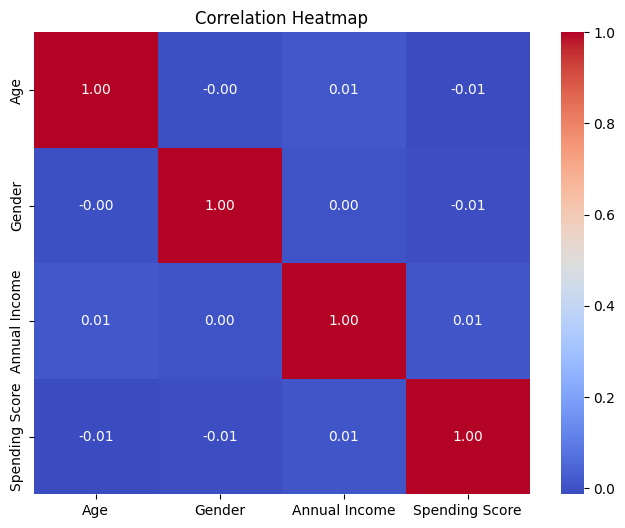

In [15]:
# Correlation heatmap to visualize relationships between variables
def plot_correlation_heatmap(data):
    plt.figure(figsize=(8, 6))
    corr = data.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()

plot_correlation_heatmap(data)

In [16]:
# Split dataset into features and target variable for supervised learning
X = data.drop('Spending Score', axis=1)
y = data['Spending Score']

# Splitting into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [17]:
#Supervised learning -linear regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on test data
y_pred_linear = linear_model.predict(X_test)

# Evaluation metrics
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression RMSE: {rmse_linear}")
print(f"Linear Regression R²: {r2_linear}")


Linear Regression RMSE: 28.875623455542495
Linear Regression R²: 0.00018128549260276738


In [26]:
from sklearn.metrics import accuracy_score


In [31]:
# For binary classification, convert probabilities to class labels
y_pred_class = [1 if prob > 0.5 else 0 for prob in y_pred_linear]

# Now calculate accuracy
accuracy = accuracy_score(y_test, y_pred_class)
print(f'Accuracy of the model: {accuracy * 100:.2f}%')



Accuracy of the model: 1.05%


In [32]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluation metrics
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf}")
print(f"Random Forest R²: {r2_rf}")


Random Forest RMSE: 31.47573189156663
Random Forest R²: -0.18798291951352253


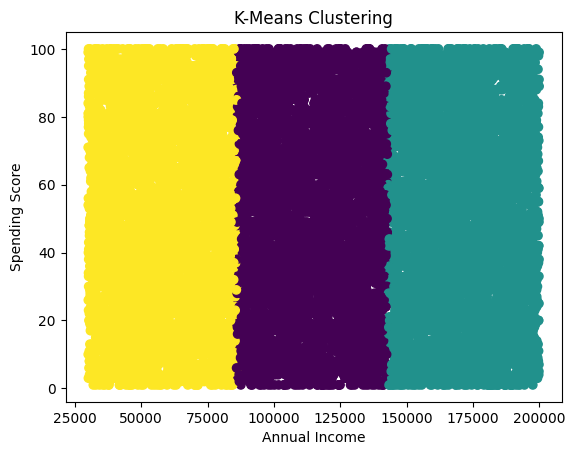

In [19]:
#Unsupervised Learning- K-Means Clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Initialize and fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['Age', 'Annual Income', 'Spending Score']])

# Visualize the clusters
plt.scatter(data['Annual Income'], data['Spending Score'], c=data['Cluster'], cmap='viridis')
plt.title("K-Means Clustering")
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


In [34]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score (measures how similar a point is to its own cluster vs. other clusters)
sil_score = silhouette_score(data[['Age', 'Annual Income', 'Spending Score']], data['Cluster'])
print(f'Silhouette Score: {sil_score:.2f}')



Silhouette Score: 0.59


In [35]:
# Inertia measures how well the clusters are formed
print(f'Inertia: {kmeans.inertia_}')

Inertia: 3820632399576.7075


In [36]:
#Hierarchical Clustering
from scipy.cluster.hierarchy import dendrogram, linkage

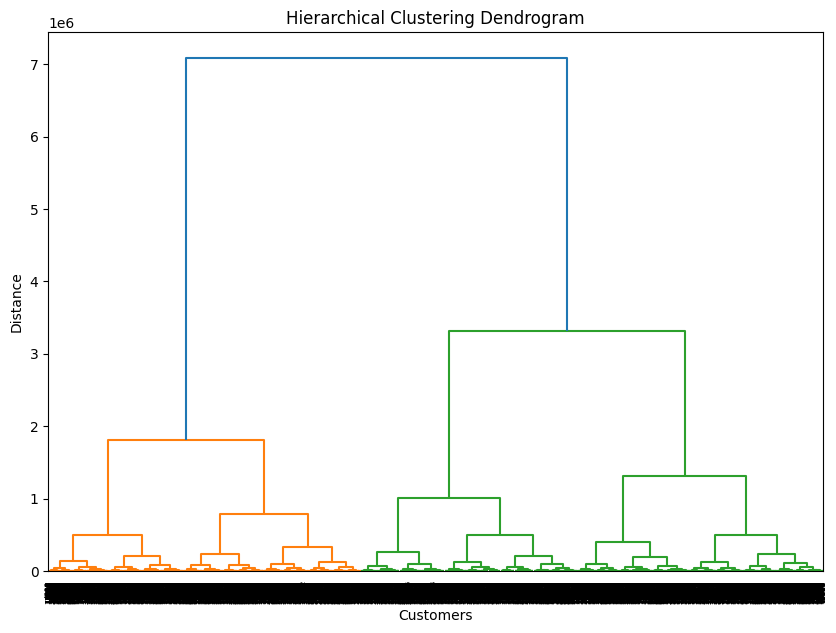

In [37]:


# Perform hierarchical clustering
linked = linkage(data[['Age', 'Annual Income', 'Spending Score']], method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()


In [38]:
# Results for Linear Regression
print(f"Linear Regression - RMSE: {rmse_linear}, R²: {r2_linear}")

# Results for Random Forest
print(f"Random Forest - RMSE: {rmse_rf}, R²: {r2_rf}")


Linear Regression - RMSE: 28.875623455542495, R²: 0.00018128549260276738
Random Forest - RMSE: 31.47573189156663, R²: -0.18798291951352253


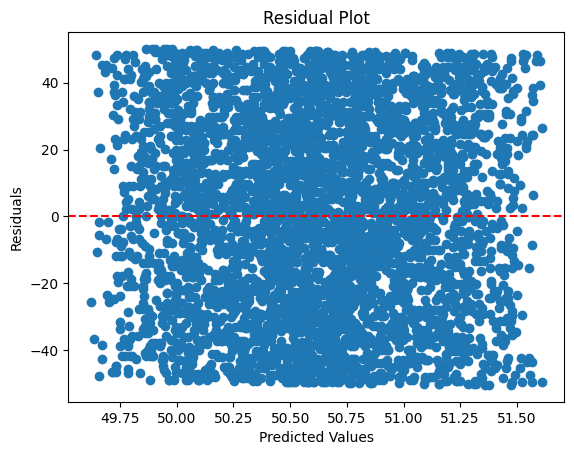

In [41]:
# Residuals
residuals = y_test - y_pred_linear

# Plot residuals
plt.scatter(y_pred_linear, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


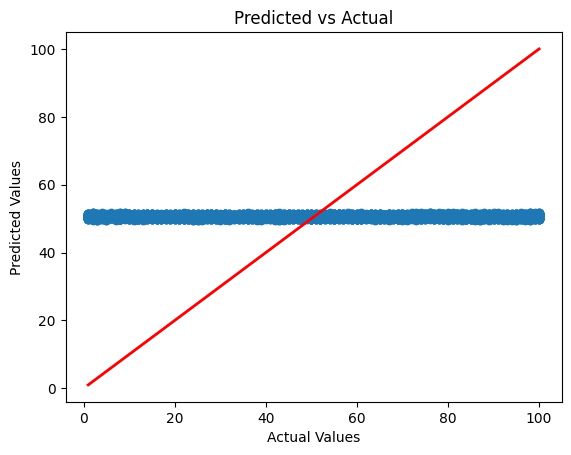

In [42]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_linear)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Identity line
plt.title('Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


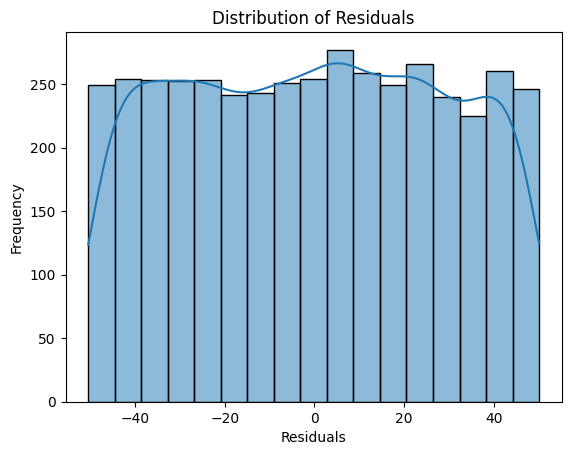

In [43]:
import seaborn as sns

# Histogram of residuals
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


In [46]:
# Display the clusters assigned by K-Means
print(data[['Annual Income', 'Spending Score', 'Cluster']].head())

# Hierarchical Clustering is visualized using the dendrogram plot above.


   Annual Income  Spending Score  Cluster
0         151479              89        1
1         185088              95        1
2          70912              76        2
3          55460              57        2
4         153752              76        1
